# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv 
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

<Axes: >

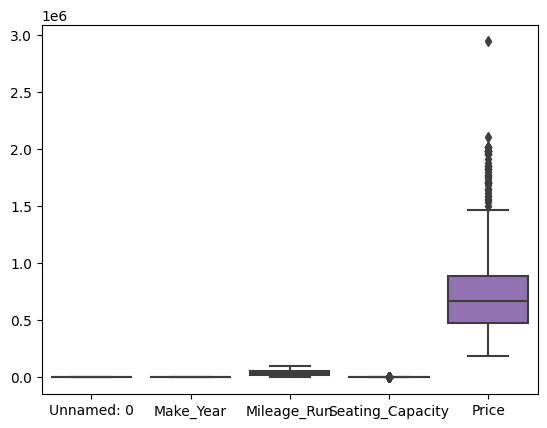

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('./data/cars_hw.csv')
df0 = df # Save the original data for a few plots
sns.boxplot(data=df)

<Axes: >

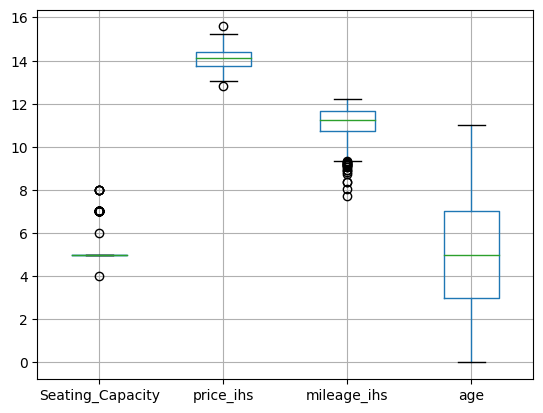

In [2]:
df['price_ihs'] = np.arcsinh(df['Price'])
df['mileage_ihs'] = np.arcsinh(df['Mileage_Run'])
df['age'] = max(df['Make_Year'])-df['Make_Year']
df = df.drop(['Price','Mileage_Run','Make_Year','Unnamed: 0'],axis=1)
df.boxplot()

  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,4.535000e+05,2.466064e+05,267000.0,288500.0,345500.0,537500.0,892000.0
Datsun,3.0,2.896667e+05,1.050397e+04,279000.0,284500.0,290000.0,295000.0,300000.0
Ford,52.0,7.211731e+05,1.409277e+05,290000.0,635000.0,707500.0,787000.0,1066000.0
Honda,73.0,7.989726e+05,2.665091e+05,316000.0,581000.0,785000.0,915000.0,1537000.0
Hyundai,305.0,6.918918e+05,2.791597e+05,248000.0,485000.0,638000.0,837000.0,1742000.0
Jeep,4.0,1.499500e+06,1.525134e+05,1290000.0,1447500.0,1529500.0,1581500.0,1649000.0
Kia,8.0,1.614750e+06,1.190567e+05,1369000.0,1579000.0,1628500.0,1705750.0,1741000.0
MG Motors,35.0,1.869457e+06,1.216611e+05,1589000.0,1786500.0,1848000.0,1978000.0,2019000.0
Mahindra,18.0,1.100167e+06,1.755493e+05,796000.0,1037000.0,1094500.0,1157000.0,1465000.0


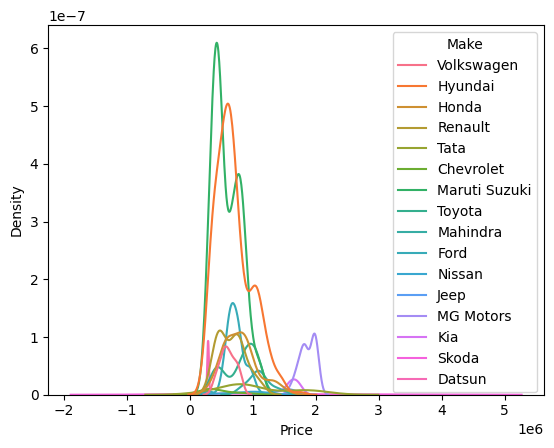

In [3]:
sns.kdeplot(data = df0, x='Price',hue='Make')
df0['Price'].groupby(df0['Make']).describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,13.613042,0.480975,13.188151,13.261539,13.445433,13.864828,14.394369
Datsun,3.0,13.269194,0.036311,13.232114,13.251449,13.270783,13.287734,13.304685
Ford,52.0,14.161427,0.210895,13.270783,14.054527,14.162640,14.269131,14.572571
Honda,73.0,14.229465,0.336972,13.356645,13.965653,14.266586,14.419827,14.938490
Hyundai,305.0,14.061658,0.398781,13.114331,13.785051,14.059241,14.330727,15.063692
Jeep,4.0,14.909738,0.105084,14.763300,14.876417,14.933413,14.966733,15.008827
Kia,8.0,14.985324,0.076877,14.822738,14.965389,14.996253,15.042662,15.063117
MG Motors,35.0,15.132199,0.066263,14.971763,15.088892,15.122762,15.190744,15.211260
Mahindra,18.0,14.592100,0.159906,14.280502,14.544955,14.598828,14.654396,14.890513


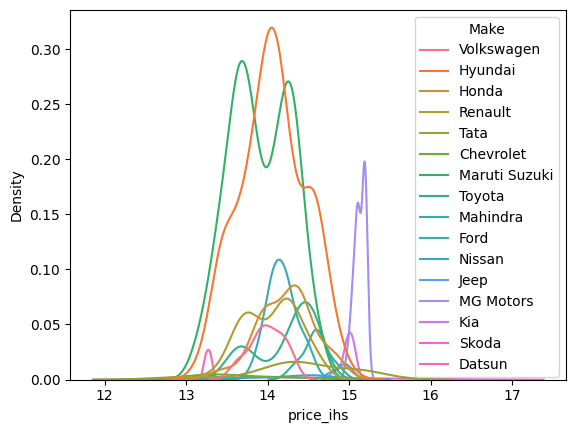

In [4]:
sns.kdeplot(data=df,x='price_ihs',hue='Make')
df['price_ihs'].groupby(df['Make']).describe()

> The MG Motors cars are by far the most expensive, then Kia, then Jeep. The kernel density plot shows that car prices are typically single peaked, except for Maruti Suzuki and Toyota. I thought there would be more of this multi-peakedness, where each peak corresponded to a particular quality/price point in the market (e.g. an entry level sedan, a luxury sedan, an SUV, and a sportscar). Prices range from 188,000 for a cheap Tata to 2,941,000 for an expensive Skoda. These are Indian Rupees, so the Skoda would cost 35,281.77 dollars and the Tata would cost 2,255.35 dollars.

<Axes: xlabel='price_ihs', ylabel='Density'>

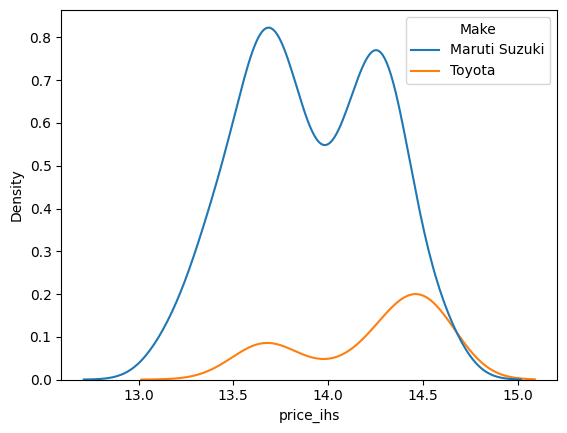

In [5]:
sns.kdeplot(data=df.loc[ df['Make'].isin(['Maruti Suzuki','Toyota'])  ,:],x='price_ihs',hue='Make')

  3. Split the data into an 80% training set and a 20% testing set.

In [6]:
# Randomize the rows in the dataframe:
N = df.shape[0]
df = df.sample(frac=1, random_state=100) # randomize the order in which data appears
train_size = int(.8*N)

# How to do the split as needed:
df_train = df[0:train_size]
y_train = df_train['price_ihs']

df_test = df[train_size:]
y_test = df_test['price_ihs']

# So the first 0:train_size rows are my training data, and train_size: are my test data.


  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?

In [7]:
from sklearn import linear_model

# Numeric regression:
var_n = ['age','mileage_ihs','Seating_Capacity'] # Select variables
X_train_n = df_train.loc[:,var_n] # Process training covariates
reg_n = linear_model.LinearRegression().fit(X_train_n,y_train) # Run regression
X_test_n = df_test.loc[:,var_n] # Process test covariates
y_hat = reg_n.predict(X_test_n)
print('Numeric only Rsq: ', reg_n.score(X_test_n,y_test)) # R2
rmse_n = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Numeric only RMSE: ', rmse_n) # R2

Numeric only Rsq:  0.45254262356326813
Numeric only RMSE:  0.33392654735906463


In [8]:
# Categorical regression:
var_cat = ['Make','Body_Type','Color','Fuel_Type','Transmission','Transmission_Type']
#
# Use a loop to make the dummy dataframe, but you could do it by hand in a bunch of lines:
dummies = pd.DataFrame([]) # In general, use lists and append instead of DataFrame and pd.concat
for var in var_cat: 
    new_dummies = pd.get_dummies( df.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True) 
    X_train_c = dummies.iloc[0:train_size,:]
    X_test_c = dummies.iloc[train_size:,:]
#
reg_c = linear_model.LinearRegression().fit(X_train_c,y_train) # Run regression
y_hat_c = reg_c.predict(X_test_c)
print('Categorical only Rsq: ', reg_c.score(X_test_c,y_test)) # R2
rmse_c = np.sqrt( np.mean( (y_test - y_hat_c)**2 ))
print('Categorical only RMSE: ', rmse_c) # R2

Categorical only Rsq:  0.6298129532407462
Categorical only RMSE:  0.2745910642522728


In [9]:
# Combine numeric _n and categorical _c variables:
X_train_all = pd.concat([X_train_n, X_train_c],axis=1, ignore_index=True)
X_test_all = pd.concat([X_test_n, X_test_c],axis=1, ignore_index=True)
#
reg_all = linear_model.LinearRegression().fit(X_train_all,y_train) # Run regression
y_hat_all = reg_all.predict(X_test_all)
print('All Rsq: ', reg_all.score(X_test_all,y_test)) # R2
rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
print('All RMSE: ', rmse_all) # R2

All Rsq:  0.7999206763763919
All RMSE:  0.20187237686198925


> The joint model with numeric and categorical variables performs the best, achieving an Rsq of .716 and RMSE of .21. The numeric only achieved .328/.317 and the categorical only achieved .493/.275. So in this case, expanding the set of features improved the performance of the model.

  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?

In [10]:
from sklearn.preprocessing import PolynomialFeatures

for d in np.arange(1,5):
    expander = PolynomialFeatures(degree=d,include_bias=False)
    #
    # Expand variables:
    Z = expander.fit_transform(X_test_n)
    names = expander.get_feature_names_out() # Get the names of these variables
    X_test_d = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
    Z = expander.fit_transform(X_train_n)
    names = expander.get_feature_names_out() # Get the names of these variables
    X_train_d = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
    X_train_d.reset_index(drop=True, inplace=True)
    X_train_c.reset_index(drop=True, inplace=True)
    X_train_all = pd.concat([X_train_d, X_train_c], axis=1, ignore_index=True)
    #
    # Reset indices for concatenating:
    X_test_d.reset_index(drop=True, inplace=True)
    X_test_c.reset_index(drop=True, inplace=True)
    X_test_all = pd.concat([X_test_d, X_test_c], axis=1, ignore_index=True)
    #
    # Regression metrics:
    reg_all = linear_model.LinearRegression().fit(X_train_all,y_train) # Run regression
    print(d, ' Rsq: ', reg_all.score(X_test_all,y_test)) # R2
    y_hat_all = reg_all.predict(X_test_all)
    rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
    print(d, 'RMSE: ', rmse_all) # R2


1  Rsq:  0.7999206763763919
1 RMSE:  0.20187237686198925
2  Rsq:  0.8025408094604631
2 RMSE:  0.20054621389085803
3  Rsq:  0.7996599800454229
3 RMSE:  0.2020038503577728
4  Rsq:  -23981719.426289123
4 RMSE:  2210.120531389429


> So the best degree is 2: An Rsq of .74 and a RMSE of .196. After that, performance falls, with a negative Rsq for degree=4.

  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

In [11]:
names

array(['age', 'mileage_ihs', 'Seating_Capacity', 'age^2',
       'age mileage_ihs', 'age Seating_Capacity', 'mileage_ihs^2',
       'mileage_ihs Seating_Capacity', 'Seating_Capacity^2', 'age^3',
       'age^2 mileage_ihs', 'age^2 Seating_Capacity', 'age mileage_ihs^2',
       'age mileage_ihs Seating_Capacity', 'age Seating_Capacity^2',
       'mileage_ihs^3', 'mileage_ihs^2 Seating_Capacity',
       'mileage_ihs Seating_Capacity^2', 'Seating_Capacity^3', 'age^4',
       'age^3 mileage_ihs', 'age^3 Seating_Capacity',
       'age^2 mileage_ihs^2', 'age^2 mileage_ihs Seating_Capacity',
       'age^2 Seating_Capacity^2', 'age mileage_ihs^3',
       'age mileage_ihs^2 Seating_Capacity',
       'age mileage_ihs Seating_Capacity^2', 'age Seating_Capacity^3',
       'mileage_ihs^4', 'mileage_ihs^3 Seating_Capacity',
       'mileage_ihs^2 Seating_Capacity^2',
       'mileage_ihs Seating_Capacity^3', 'Seating_Capacity^4'],
      dtype=object)

<Axes: xlabel='price_ihs'>

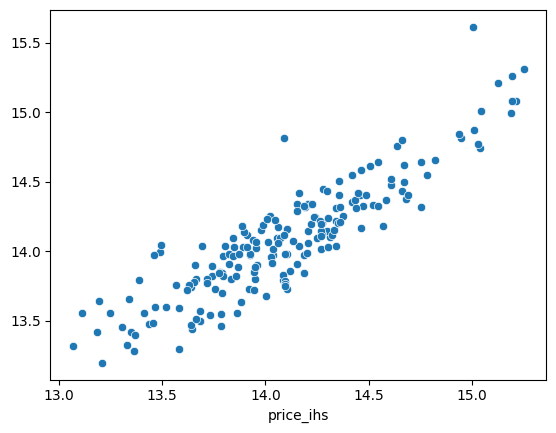

In [12]:
# Reuse earlier code to get predictions:
d = 2
#
expander = PolynomialFeatures(degree=d,include_bias=False)
Z = expander.fit_transform(X_test_n)
names = expander.get_feature_names_out() # Get the names of these variables
X_test_d = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
#
Z = expander.fit_transform(X_train_n)
names = expander.get_feature_names_out() # Get the names of these variables
X_train_d = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
#
X_train_d.reset_index(drop=True, inplace=True)
X_train_c.reset_index(drop=True, inplace=True)
X_train_all = pd.concat([X_train_d, X_train_c], axis=1)
X_train_all.columns = X_train_all.columns.astype(str)
# Reset indices for concatenating:
X_test_d.reset_index(drop=True, inplace=True)
X_test_c.reset_index(drop=True, inplace=True)
X_test_all = pd.concat([X_test_d, X_test_c], axis=1)
X_test_all.columns = X_test_all.columns.astype(str)
# Run regression   
reg_all = linear_model.LinearRegression().fit(X_train_all,y_train) # Run regression
# Predictions and residuals:
y_hat_all = reg_all.predict(X_test_all)
residuals = y_test - y_hat_all

# Scatterplot:
sns.scatterplot(x=y_test,y=y_hat_all)

> Looks like the values line up pretty well along the diagonal.

<Axes: xlabel='price_ihs', ylabel='Density'>

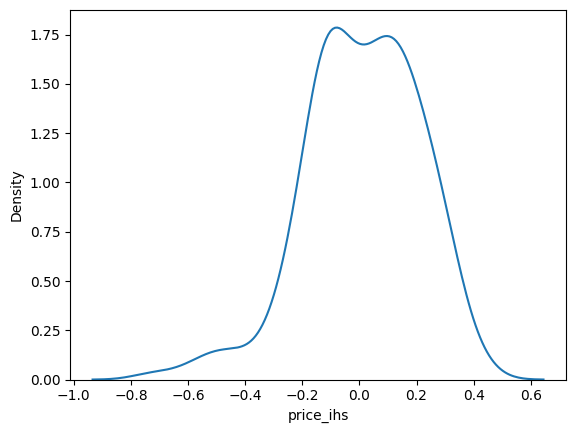

In [13]:
sns.kdeplot(residuals)

> Looks slightly bi-modal with a bit of a left tail, but otherwise symmetric around zero and bell-shaped. Those two peaks might be a statistical artifact that would vanish if we did the test-train split differently, or it might be a real feature of the data. The bi-modal nature suggests there's more discrete, unobserved heterogeneity in the data that could explain why there are multiple peaks that we're just missing.

In [14]:
from sklearn import tree 

X_train_n.reset_index(drop=True, inplace=True)
X_train_c.reset_index(drop=True, inplace=True)
X_train_all = pd.concat([X_train_n, X_train_c],axis=1)
X_train_all.columns = X_train_all.columns.astype(str)
X_test_n.reset_index(drop=True, inplace=True)
X_test_c.reset_index(drop=True, inplace=True)
X_test_all = pd.concat([X_test_n, X_test_c],axis=1)
X_test_all.columns = X_test_all.columns.astype(str)

sup_depth = 20
for d in np.arange(2,sup_depth):
    model = tree.DecisionTreeRegressor(max_depth=d) # Fit the classifier
    cart = model.fit(X_train_all, y_train) # 
    cart.score(X_test_all,y_test)
    y_hat = cart.predict(X_test_all)
    rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
    print('Depth: ', d, ', RMSE: ', rmse, ', Rsq: ', cart.score(X_test_all,y_test)) # R2


Depth:  2 , RMSE:  0.3014612490422261 , Rsq:  0.5538186573009416
Depth:  3 , RMSE:  0.27086596262146234 , Rsq:  0.6397887383319341
Depth:  4 , RMSE:  0.2485926575566351 , Rsq:  0.6965934082540721
Depth:  5 , RMSE:  0.23551721719289068 , Rsq:  0.7276710948880618
Depth:  6 , RMSE:  0.2424308663904802 , Rsq:  0.7114478964043165
Depth:  7 , RMSE:  0.2225510217752755 , Rsq:  0.75683133934993
Depth:  8 , RMSE:  0.2575692112654507 , Rsq:  0.6742860841977538
Depth:  9 , RMSE:  0.25277135529716105 , Rsq:  0.6863075026674949
Depth:  10 , RMSE:  0.255226852256197 , Rsq:  0.6801832937412267
Depth:  11 , RMSE:  0.22837288555738625 , Rsq:  0.7439425027181266
Depth:  12 , RMSE:  0.2678092324114279 , Rsq:  0.647872853731366
Depth:  13 , RMSE:  0.23220704531236222 , Rsq:  0.7352724121885719
Depth:  14 , RMSE:  0.2668360472092012 , Rsq:  0.6504273757537823
Depth:  15 , RMSE:  0.2343626624446905 , Rsq:  0.7303345770844216
Depth:  16 , RMSE:  0.22998714431104855 , Rsq:  0.7403098129822262
Depth:  17 , RMS

  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?

> Looks like a depth of around 9 gives the best results, with an Rsq of .61 and RMSE of .24. (It's nice to do this train/test split to pick the depth, but we'll want to cross validate later instead.)

  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?

<Axes: xlabel='price_ihs'>

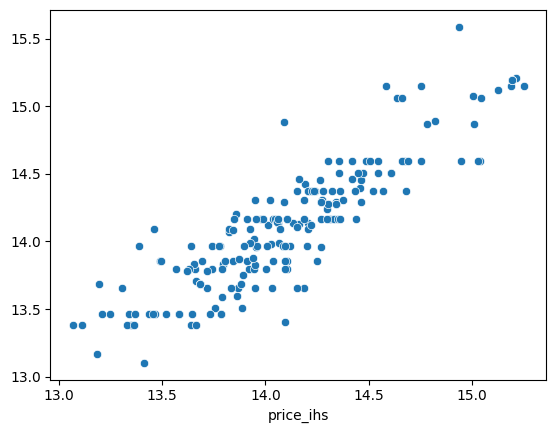

In [15]:
model = tree.DecisionTreeRegressor(max_depth=9, random_state=100) 
cart = model.fit(X_train_all, y_train)
y_hat = cart.predict(X_test_all)
residuals = y_test - y_hat

sns.scatterplot(x=y_test,y=y_hat)

<Axes: xlabel='price_ihs', ylabel='Density'>

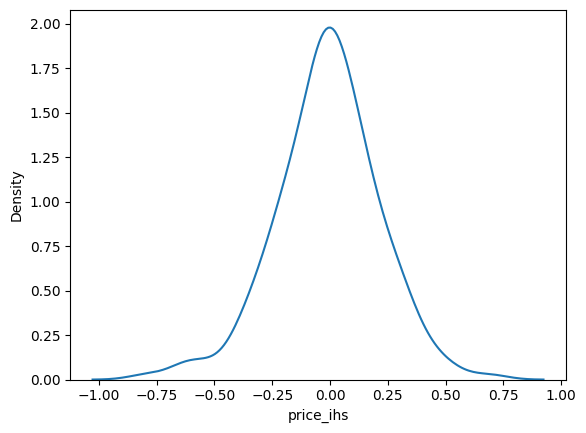

In [16]:
sns.kdeplot(residuals)

> The residuals are roughly bell-shaped around zero, but have a bloop around .4. Again, it looks like perhaps there is some information we don't have or aren't using that could help us build a better model that fits the data better.

  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

> The best linear model with degree=2 achieved an Rsq/RMSE of .74/.196 while the best tree with a max_depth=9 achieved an Rsq/RMSE of .61/.24. In this case, it appears the linear model has better performance on the test set.

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/wages_hw.csv')
df = df.drop(['Unnamed: 0'],axis=1)
df['Intercept'] = np.ones(df.shape[0])
print( np.sum(df.isnull()))

Rating        0
Size          0
Sector        0
avg_salary    0
job_state     0
Intercept     0
dtype: int64


In [18]:
df['Sector'] = df['Sector'].str.replace('-1','Missing')

In [19]:
df.head()

,Rating,Size,Sector,avg_salary,job_state,Intercept
0,3.8,501 to 1000 employees,Aerospace & Defense,72.0,NM,1.0
1,3.4,10000+ employees,Health Care,87.5,MD,1.0
2,4.8,501 to 1000 employees,Business Services,85.0,FL,1.0
3,3.8,1001 to 5000 employees,"Oil, Gas, Energy & Utilities",76.5,WA,1.0
4,2.9,51 to 200 employees,Business Services,114.5,NY,1.0


In [20]:
df.describe()

,Rating,avg_salary,Intercept
count,731.000000,731.000000,731.0
mean,3.688372,100.090971,1.0
std,0.570353,38.537585,0.0
min,1.900000,13.500000,1.0
25%,3.300000,73.000000,1.0
50%,3.700000,96.500000,1.0
75%,4.000000,122.500000,1.0
max,5.000000,254.000000,1.0


<Axes: >

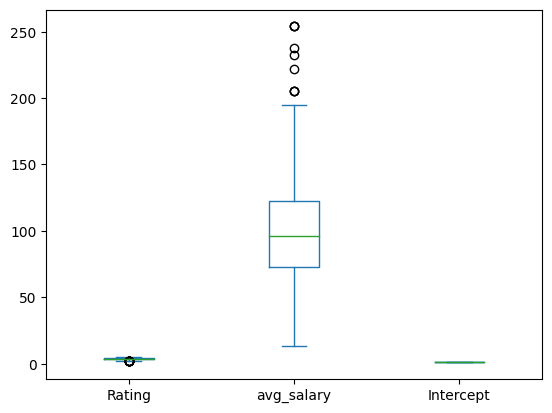

In [21]:
df.plot.box()

> It looks like some salaries are outliers, but I am going to go with it.

In [22]:
tab = df['Sector'].value_counts()

In [23]:
np.random.seed(1000)

N = df.shape[0]
train_size = int(.8*N)

index = np.arange(N)
np.random.shuffle(index)

train_rows = index[:train_size]
test_rows = index[train_size:]

y = df['avg_salary']
y_train = y.iloc[train_rows]
y_test = y.iloc[test_rows]

  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set? 

In [24]:
from sklearn import linear_model

dummies = pd.get_dummies( df.loc[:,'Sector'], dtype=int)
X_train = dummies.iloc[train_rows,:]
X_test = dummies.iloc[test_rows,:]
#
reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train) # Run regression

# Extract wage dummies
rdf = pd.DataFrame({'variable': reg.feature_names_in_, 'slope':reg.coef_})
rdf.sort_values(by='slope',axis=0)

,variable,slope
6,"Construction, Repair & Maintenance",26.500000
3,"Arts, Entertainment & Recreation",48.500000
11,Health Care,68.837500
24,Travel & Tourism,70.142857
19,"Oil, Gas, Energy & Utilities",78.181818
18,Non-Profit,79.700000
2,Agriculture & Forestry,80.500000
14,Manufacturing,80.537037
10,Government,86.055556
5,Business Services,96.239726


> Media, Accounting and Legal, Information Technology, and Biotech and Pharma have the highest values. 

In [25]:
# Rsq and RMSE
y_hat = reg.predict(X_test)
print('Rsq: ', reg.score(X_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ) )
print('RMSE: ', rmse) 

Rsq:  0.10786156021224103
RMSE:  31.81255349338017


> The Rsq is not so bad! At least it is non-negative.

  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?

<Axes: xlabel='Rating', ylabel='avg_salary'>

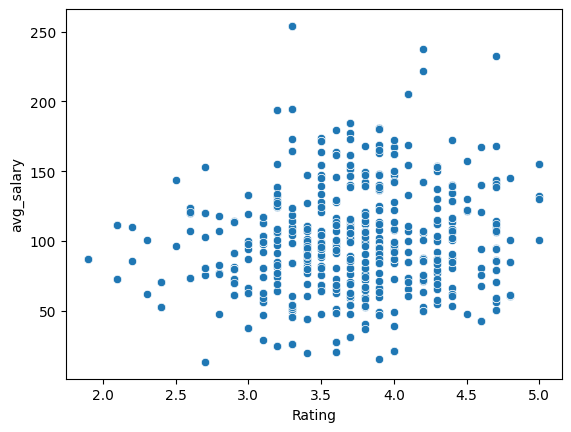

In [26]:
sns.scatterplot(data=df,x='Rating',y='avg_salary')

> Looks like a cloud of points to me, with no particular relationship. I will not be surprised if the Rsq is not strictly positive. 

In [27]:
from sklearn import linear_model

X_train = df.loc[train_rows,['Intercept','Rating'] ]
X_test = df.loc[test_rows,['Intercept','Rating'] ]

reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train) # Run regression

# Rsq and RMSE
X_test = df.loc[test_rows, ['Intercept','Rating'] ]
print('Rsq: ', reg.score(X_test,y_test)) # R2
y_hat = reg.predict(X_test)
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) 

fx_num = reg.coef_[0] + reg.coef_[1]*np.arange(2,6,1)
gdf1 = pd.DataFrame({'Rating':np.arange(2,6,1),'Effect':fx_num,'Version':'Numeric'})

rdf = pd.DataFrame({'variable': reg.feature_names_in_, 'slope':reg.coef_})
rdf.sort_values(by='slope',axis=0)


Rsq:  0.0012158997447975217
RMSE:  33.660317944994524


,variable,slope
1,Rating,9.461627
0,Intercept,65.851291


> So if rating goes up by 1, predicted wages go up by 9.5k, with a starting salary for "zero star" companies of 65k. That Rsq is not so great, but we didn't see a strong relationship between rating and avg_salary in the scatterplot anyway.

In [28]:
# Let's one-hot encode the ratings
df['Rating_rnd'] = df['Rating'].round()

X_train = df.loc[train_rows,['Rating_rnd'] ]
dummies_train = pd.get_dummies(X_train['Rating_rnd'],dtype=int)

reg = linear_model.LinearRegression(fit_intercept=False).fit(dummies_train,y_train) # Run regression

# Rsq and RMSE
X_test = df.loc[test_rows,['Rating_rnd'] ]
dummies_test = pd.get_dummies(X_test['Rating_rnd'],dtype=int)
y_hat = reg.predict(dummies_test)

print('Rsq: ', reg.score(dummies_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) 

rdf = pd.DataFrame({'variable': dummies_train.columns, 'slope':reg.coef_})
rdf

Rsq:  -0.003408188834975734
RMSE:  33.73814685499916


,variable,slope
0,2.0,81.735294
1,3.0,95.054878
2,4.0,104.227528
3,5.0,102.457447


> What's the real difference between the numeric regression and the dummy regression? You can see in the next plot, the numeric regression forces all the points onto a line with the same slope, while the dummy version allows the "step sizes" between ratings to vary.
> That Rsq is not great! It is less than zero, which means that using the mean of the training data as a predictor rather than the dummies does a better job on the test set. It's not the end of the world, don't do more work. 

<Axes: xlabel='Rating', ylabel='Effect'>

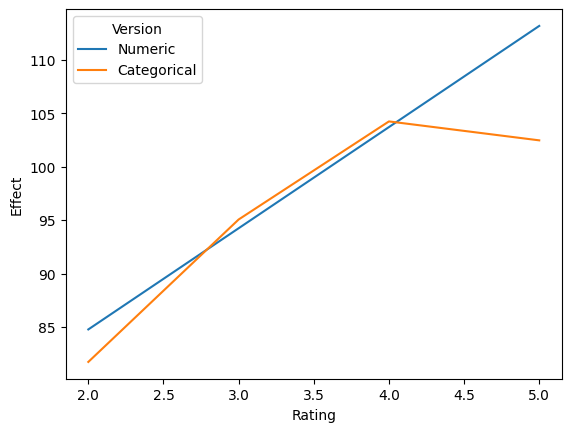

In [29]:
gdf2 = pd.DataFrame({'Rating':np.arange(2,6,1),'Effect':reg.coef_,'Version':'Categorical'})
gdf =  pd.concat([gdf1,gdf2],axis=0)
sns.lineplot(data=gdf,x='Rating',y='Effect',hue='Version')

> So going from 4 star to 5 star seems to possibly flatten or reduce wages. Why might that be? One possible explanation: If you're at a place where it's actually nice to work, that's part of your compensation and they don't have to pay as much to get you to work there.

  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?

In [30]:
df['SxR'] = df.loc[:,'Sector'] + 'X' + df.loc[:,'Rating_rnd'].astype(str)
dummies = pd.get_dummies(df.loc[:,'SxR'], dtype=int ) 

# Fit linear model
dummies_train = dummies.iloc[train_rows,:]
reg = linear_model.LinearRegression(fit_intercept=False).fit(dummies_train,y_train) # Run regression
rdf = pd.DataFrame({'variable': dummies_train.columns, 'slope':reg.coef_})
print(rdf.sort_values(by='slope',axis=0).to_string())

                                  variable       slope
14  Construction, Repair & MaintenanceX3.0   26.500000
47                  TelecommunicationsX3.0   44.000000
39                          Non-ProfitX3.0   47.500000
5     Arts, Entertainment & RecreationX4.0   48.500000
31                       ManufacturingX2.0   52.500000
20                             FinanceX5.0   56.750000
24                         Health CareX4.0   58.413043
51                    Travel & TourismX4.0   70.142857
41        Oil, Gas, Energy & UtilitiesX4.0   78.181818
4               Agriculture & ForestryX5.0   80.500000
23                         Health CareX3.0   82.941176
21                          GovernmentX3.0   83.928571
3                  Aerospace & DefenseX5.0   84.357143
32                       ManufacturingX3.0   84.794118
18                             FinanceX3.0   86.625000
44                              RetailX2.0   86.833333
33                       ManufacturingX4.0   87.166667
7         

In [31]:
dummies_test = dummies.iloc[test_rows,:]
y_hat = reg.predict(dummies_test)
print('Rsq: ', reg.score(dummies_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) 

Rsq:  0.23491600794936873
RMSE:  29.460286188024984


  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4? 

In [32]:
state_dummies = pd.get_dummies(df['job_state'],dtype=int)
size_dummies = pd.get_dummies(df['Size'],dtype=int)
sector_dummies = pd.get_dummies(df['Sector'],dtype=int)

X_num = df.loc[:,['Intercept','Rating_rnd'] ] 

X = pd.concat([X_num, state_dummies, size_dummies, sector_dummies],axis=1)

X.head()

,Intercept,Rating_rnd,AL,AZ,CA,CO,CT,DC,DE,FL,...,Media,Mining & Metals,Missing,Non-Profit,"Oil, Gas, Energy & Utilities",Real Estate,Retail,Telecommunications,Transportation & Logistics,Travel & Tourism
0,1.0,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,5.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.0,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn import linear_model

X_train = X.iloc[train_rows,:]
X_test = X.loc[test_rows,:]

reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train) # Run regression

# Rsq and RMSE
print('Rsq: ', reg.score(X_test,y_test)) # R2
y_hat = reg.predict(X_test)
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) 

rdf = pd.DataFrame({'variable': reg.feature_names_in_, 'slope':reg.coef_})
rdf.sort_values(by='slope',axis=0)


Rsq:  -5.365782981719925e+19
RMSE:  246716931903.64594


,variable,slope
51,"Arts, Entertainment & Recreation",-3.071239e+12
54,"Construction, Repair & Maintenance",-3.071239e+12
66,Non-Profit,-3.071239e+12
72,Travel & Tourism,-3.071239e+12
67,"Oil, Gas, Energy & Utilities",-3.071239e+12
...,...,...
46,51 to 200 employees,5.207484e+12
42,1001 to 5000 employees,5.207484e+12
40,1 to 50 employees,5.207484e+12
41,10000+ employees,5.207484e+12


> That's quite a negative Rsq! This model is overfit. Our best model so far is just the simple regression on sector. So it's nice we have all these variables, but including all of them is leading to multicolinearity or bad control, negative Rsq, and huge RMSE.

  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?

In [34]:
from sklearn import tree 

# 2.
dummies = pd.get_dummies( df.loc[:,'Sector'], dtype=int)
X_train = dummies.iloc[train_rows,:]
X_test = dummies.iloc[test_rows,:]

model = tree.DecisionTreeRegressor()
cart = model.fit(X_train, y_train) # 

y_hat = cart.predict(X_test)
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))

print('Part 2, just sector. Rsq: ', cart.score(X_test,y_test), ', RMSE: ', rmse)


# 3.
X_train = df.loc[train_rows,['Intercept','Rating'] ]
X_test = df.loc[test_rows,['Intercept','Rating'] ]

model = tree.DecisionTreeRegressor()
cart = model.fit(X_train, y_train) # 

y_hat = cart.predict(X_test)
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))

print('Part 3, just rating. Rsq: ', cart.score(X_test,y_test), ', RMSE: ', rmse)


# 4.
df['SxR'] = df.loc[:,'Sector'] + 'X' + df.loc[:,'Rating_rnd'].astype(str)
dummies = pd.get_dummies(df.loc[:,'SxR'], dtype=int ) 
X_train = dummies.iloc[train_rows,:]
X_test = dummies.iloc[test_rows,:]

model = tree.DecisionTreeRegressor()
cart = model.fit(X_train, y_train) # 

y_hat = cart.predict(X_test)
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))

print('Part 4, sector-rating. Rsq: ', cart.score(X_test,y_test), ', RMSE: ', rmse)


Part 2, just sector. Rsq:  0.1078615602122408 , RMSE:  31.812553493380175
Part 3, just rating. Rsq:  -0.0038736868222599696 , RMSE:  33.74597179533482
Part 4, sector-rating. Rsq:  0.23491600794936895 , RMSE:  29.46028618802498


> For parts 2 and 3, the performance is the same. Why does the decision tree do much better in part 4? Let's take a dangerous step and actually look at the tree:

[Text(0.9629629629629629, 0.9903846153846154, 'Health CareX4.0 <= 0.5\nsquared_error = 1567.992\nsamples = 584\nvalue = 100.854'),
 Text(0.9444444444444444, 0.9711538461538461, 'Information TechnologyX4.0 <= 0.5\nsquared_error = 1468.449\nsamples = 561\nvalue = 102.594'),
 Text(0.9259259259259259, 0.9519230769230769, 'Biotech & PharmaceuticalsX4.0 <= 0.5\nsquared_error = 1410.741\nsamples = 456\nvalue = 99.602'),
 Text(0.9074074074074074, 0.9326923076923077, 'Construction, Repair & MaintenanceX3.0 <= 0.5\nsquared_error = 1386.85\nsamples = 395\nvalue = 96.441'),
 Text(0.8888888888888888, 0.9134615384615384, 'Information TechnologyX5.0 <= 0.5\nsquared_error = 1359.741\nsamples = 392\nvalue = 96.976'),
 Text(0.8703703703703703, 0.8942307692307693, 'ManufacturingX2.0 <= 0.5\nsquared_error = 1298.067\nsamples = 376\nvalue = 95.931'),
 Text(0.8518518518518519, 0.875, 'Arts, Entertainment & RecreationX4.0 <= 0.5\nsquared_error = 1291.525\nsamples = 372\nvalue = 96.398'),
 Text(0.833333333333

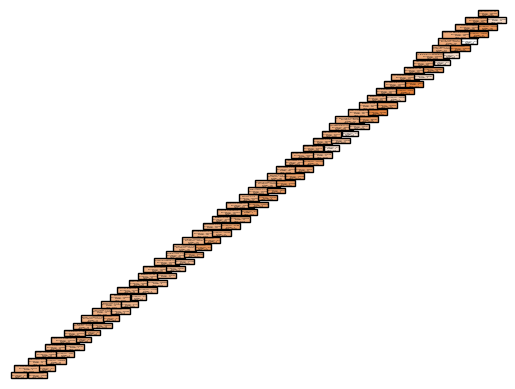

In [35]:
tree.plot_tree(cart,filled=True,feature_names = X_train.columns.tolist()) 

> So the answer goes something like this: The linear regression is committed to including the variables you pass to `.LinearRegression`. It can't decide that some variables are good and others are bad. On the other hand, the decision tree is going to make those decisions itself. So it essentially "drops" a huge number of the SectorXRating interactions, giving it more freedom to make data driven decisions about what kinds of interactions matter and which are just noise. Ultimately, you get a respectable Rsq of .235, much better than the linear model's best performance of .107. Now, there is a tool we'll cover later called the LASSO which does a similar thing for linear regression, maintaining interpretablility but also dropping the variables that are increasing predictor variance without reducing bias.

  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?

In [36]:
# Categorical Variables:
state_dummies = pd.get_dummies(df['job_state'],dtype=int)
size_dummies = pd.get_dummies(df['Size'],dtype=int)
sector_dummies = pd.get_dummies(df['Sector'],dtype=int)

# Numeric Variables:
X_num = df.loc[:,['Intercept','Rating_rnd'] ] 
X = pd.concat([X_num, state_dummies, size_dummies, sector_dummies],axis=1)

# Train-test split:
X_train = X.iloc[train_rows,:]
X_test = X.loc[test_rows,:]

model = tree.DecisionTreeRegressor()
cart = model.fit(X_train, y_train) # 

y_hat = cart.predict(X_test)
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))

print('Part 4, sector-rating. Rsq: ', cart.score(X_test,y_test), ', RMSE: ', rmse)


Part 4, sector-rating. Rsq:  0.2782686257675451 , RMSE:  28.613448102654132


  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

> Depends on the student.

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high 
    - Husband's education (categorical) 1=low, 2, 3, 4=high 
    - Number of children ever born (numerical) 
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('./data/contraception_hw.csv')
df = df.drop(['Unnamed: 0'],axis=1)
print( np.sum(df.isnull()))
df.head()

age                      0
edu                      0
edu_spouse               0
numberChildren           0
religion                 0
working                  0
spouse_occupation        0
standardOfLivingIndex    0
mediaExposure            0
method                   0
dtype: int64


,age,edu,edu_spouse,numberChildren,religion,working,spouse_occupation,standardOfLivingIndex,mediaExposure,method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


  2. Split the sample into ~80% training data and ~20% testing data.

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('method',axis=1), df['method'], test_size=0.2, random_state=50)

  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.

> I restricted the `max_depth` parameter to 2 so I could make sense of the tree.

[Text(0.5, 0.8333333333333334, 'numberChildren <= 0.5\nsquared_error = 0.773\nsamples = 1178\nvalue = 1.918'),
 Text(0.25, 0.5, 'age <= 17.5\nsquared_error = 0.099\nsamples = 79\nvalue = 1.051'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 3.0'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.051\nsamples = 78\nvalue = 1.026'),
 Text(0.75, 0.5, 'age <= 37.5\nsquared_error = 0.764\nsamples = 1099\nvalue = 1.98'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.764\nsamples = 776\nvalue = 2.112'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.62\nsamples = 323\nvalue = 1.663')]

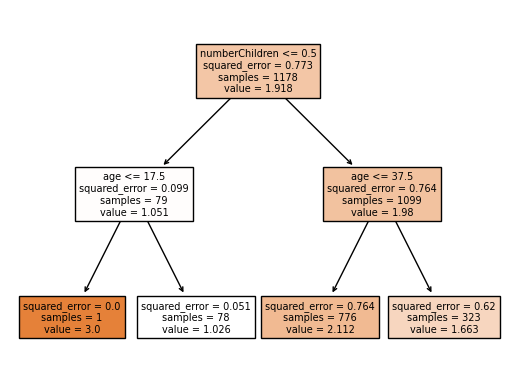

In [39]:
from sklearn import tree 
model = tree.DecisionTreeRegressor(max_depth=2, random_state=100) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True,feature_names = X_train.columns.tolist()) 

> At the bottom of the tree, we have values like 1.026 or 2.112. These aren't probabilities of using one of the three methods, and they're not methods themselves. This is just bad prediction. We want to predict 1, 2 or 3, not an intermediate value between them.

  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?

[Text(0.5, 0.8333333333333334, 'numberChildren <= 0.5\ngini = 0.644\nsamples = 1178\nvalue = [508, 259, 411]'),
 Text(0.25, 0.5, 'age <= 17.5\ngini = 0.049\nsamples = 79\nvalue = [77, 0, 2]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.025\nsamples = 78\nvalue = [77, 0, 1]'),
 Text(0.75, 0.5, 'edu <= 3.5\ngini = 0.652\nsamples = 1099\nvalue = [431, 259, 409]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.609\nsamples = 676\nvalue = [324, 100, 252]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.657\nsamples = 423\nvalue = [107, 159, 157]')]

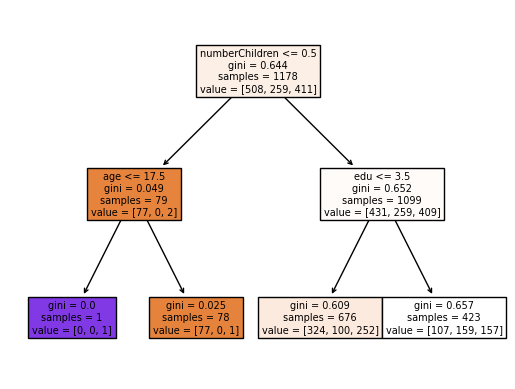

In [40]:
model = tree.DecisionTreeClassifier(max_depth=2,random_state=100) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True,feature_names = X_train.columns.tolist()) 

> Let's recall, contraceptive use is 1=No-use, 2=Long-term, 3=Short-term. For respondents under 18 with no children, most are using no contraception or short-term contraception. For respondents with a child, respondents with less than the highest recorded education level mostly are not using contraception (324/676) or short-term contraception (252/676), while those with the highest education level are split equally across the three methods.

  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.

> To give the model more of a chance to do a good job at predicting, I'll remove the max_depth constraint and just let it run.

In [41]:
model = tree.DecisionTreeClassifier(random_state=0) # Fit the classifier
cart = model.fit(X_train, y_train)
y_hat = cart.predict(X_test)

tab = pd.crosstab(y_hat, y_test)
acc = (tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[2,2])/len(y_test)
print('Accuracy: ',acc)

acc1 = tab.iloc[0,0]/(tab.iloc[0,0]+tab.iloc[0,1]+tab.iloc[0,2])
print('Accuracy, 1: ',acc1)

acc2 = tab.iloc[1,1]/(tab.iloc[1,0]+tab.iloc[1,1]+tab.iloc[1,2])
print('Accuracy, 2: ',acc2)

acc3 = tab.iloc[2,2]/(tab.iloc[2,0]+tab.iloc[2,1]+tab.iloc[2,2])
print('Accuracy, 3: ',acc3)

pd.crosstab(y_hat, y_test)


Accuracy:  0.5084745762711864
Accuracy, 1:  0.5887096774193549
Accuracy, 2:  0.4246575342465753
Accuracy, 3:  0.46938775510204084


method,1,2,3
row_0,,,
1,73,19,32
2,20,31,22
3,28,24,46


> Overall, the accuracy is .508. If you think about whether it does a better job predicting each method individually, we can compute the number correct divided by number predicted to get an accuracy for each prediction. Accuracy is best for no contraception at .589, followed by short-term at .469, followed by long-term at .425. 

  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

> An LPM $ y = b\cdot x$ splits the space into two groups: Those for whom $b \cdot x >0$ and those for whom $b \cdot x \le 0$. This only allows you to distinguish between two categories, not three or more. There are plenty of methods that use a linear model like $b \cdot x$ as a workhorse component of a non-linear model which allows more complex decision rules, like multinomial logit or support vector machines.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent 
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.

In [42]:
df = pd.read_csv('./data/pretrial_data.csv')
print(df.head())

df['held'] = df['held_wo_bail'].astype(int)
df['sex'] = df['sex'].replace(['M','F'],['Male','Female'])
df['Black'] = (df['race']=='B').astype(int)
rdf = df.loc[:,['held','Black','sex','case_type','is_poor','prior_F']]
rdf = rdf.dropna()
rdf['held'].value_counts()

   Unnamed: 0 case_type   age sex race  is_poor  bond  bond_type  prior_F  \
0           0         F  31.0   M    W      NaN   NaN          7      0.0   
1           1         F  60.0   M    B      NaN   NaN          7     13.0   
2           2         M  27.0   M    W      NaN   NaN          7      0.0   
3           3         M  27.0   M    B      0.0   NaN          7      0.0   
4           4         F  28.0   F    W      0.0   NaN          7      0.0   

   prior_M  gini  released  sentence_type   sentence  bond_NA  held_wo_bail  \
0      0.0  0.44       NaN            NaN        NaN     True         False   
1     21.0  0.44       0.0            0.0  60.000000     True         False   
2      0.0  0.44       0.0            1.0  12.000000     True         False   
3      9.0  0.44       0.0            1.0   0.985626     True         False   
4      0.0  0.44       1.0            4.0   0.000000     True         False   

   sentence_NA  
0         True  
1        False  
2        Fa

held
0    15844
1     5710
Name: count, dtype: int64

2. Create a dummy variable indicating that the defendant is Black.

In [43]:
df['Black'] = (df['race']=='B').astype(int)

3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?

In [44]:
from sklearn.linear_model import LinearRegression # Import linear regression model

4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 3, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.

In [45]:
from sklearn.linear_model import LinearRegression # Import linear regression model

sex_dummies = pd.get_dummies(rdf['sex'],dtype='int',drop_first=True)
case_type_dummies = pd.get_dummies(rdf['case_type'],dtype='int',drop_first=True)

## Black and Sex
y = rdf['held']
X = pd.concat([rdf['Black'],sex_dummies],axis=1)
reg = LinearRegression().fit(X,y)
sdf = pd.DataFrame({'variable': X.columns, 'slope':reg.coef_})
sdf

,variable,slope
0,Black,0.063244
1,Male,0.101377


In [46]:
## Black and Sex and is_poor
y = rdf['held']
X = pd.concat([rdf.loc[:,['Black','is_poor']],sex_dummies],axis=1)
reg = LinearRegression().fit(X,y)
sdf = pd.DataFrame({'variable': X.columns, 'slope':reg.coef_})
sdf

,variable,slope
0,Black,0.036386
1,is_poor,0.185337
2,Male,0.114845


In [47]:
## Black and Sex and is_poor and prior_F
y = rdf['held']
X = pd.concat([rdf.loc[:,['Black','is_poor','prior_F']],sex_dummies],axis=1)
reg = LinearRegression().fit(X,y)
sdf = pd.DataFrame({'variable': X.columns, 'slope':reg.coef_})
sdf

,variable,slope
0,Black,0.026643
1,is_poor,0.167606
2,prior_F,0.026004
3,Male,0.097799


In [48]:
## Black and Sex and is_poor and prior_F and case_type
y = rdf['held']
X = pd.concat([rdf.loc[:,['Black','is_poor','prior_F']],sex_dummies,case_type_dummies],axis=1)
reg = LinearRegression().fit(X,y)
sdf = pd.DataFrame({'variable': X.columns, 'slope':reg.coef_})
sdf

,variable,slope
0,Black,0.019542
1,is_poor,0.073680
2,prior_F,0.016164
3,Male,0.084493
4,I,-0.508384
5,M,-0.421186
6,S,-0.139857


5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.

In [49]:
rdf.head()

,held,Black,sex,case_type,is_poor,prior_F
3,0,1,Male,M,0.0,0.0
4,0,0,Female,F,0.0,0.0
5,0,1,Male,M,0.0,1.0
6,0,1,Female,F,1.0,0.0
7,0,1,Male,M,0.0,0.0


In [50]:
rdf['raceXsex'] = rdf['Black'].replace([0,1],['Other','Black'])+'x'+rdf['sex']
rdf['raceXsex']

3          BlackxMale
4        OtherxFemale
5          BlackxMale
6        BlackxFemale
7          BlackxMale
             ...     
22980      OtherxMale
22981      BlackxMale
22983      BlackxMale
22984    BlackxFemale
22985      BlackxMale
Name: raceXsex, Length: 21554, dtype: object

In [51]:
y = rdf['held']
X = pd.get_dummies(rdf['raceXsex'],dtype=int)
reg = LinearRegression(fit_intercept=False).fit(X,y)
sdf = pd.DataFrame({'variable': X.columns, 'slope':reg.coef_})
sdf

,variable,slope
0,BlackxFemale,0.174618
1,BlackxMale,0.347722
2,OtherxFemale,0.196509
3,OtherxMale,0.253858


> What's interesting here is that Black women have a base probability of .17 of being held without bail, which is the lowest. On the other hand, Black men have a predicted probability of .35 of being held without bail, more than double. Other races have, on average, probabilities in the middle, of .2 for women and .25 for men. One thing to notice is that all of these numbers are surprisingly high: 1 in 10 or 1 in 3 people are held without bail before their trial? This does not seem consistent with "innocent until proven guilty." I think this is interesting but not entirely unexpected, but I would want to look into the data more before making guesses about what's driving the numbers.

6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

> Before getting into this, I just want to reiterate that I ask these questions because I care about how data are used and how the tools impact vulnerable people in society. This situation is statistically and computationally more complex than you probably think. I think the legal system discriminates against, among other groups, Black people and in particular Black men. 
> 
> Before opposing this idea, let's make a pro argument: "In cases where the system is extremely biased, it might help to have a quantiative tool that can be explored and subjected to rigorous quantitative examination. Even if that tool is unfair, it might be more fair than some of the systems people actually face." In principle, this might be a meaningful step towards improving society, and being optimistic about technology is a totally fair position as long as it is tempered by healthy skepticism.
>
> The concern is that this kind of tool just uses data from past cases to predict how new cases might be decided. If the past system is not fair or just, predicting how it would behave in the future does not somehow magically create fairness or justice. If we're worried about the old system, working hard to create a predictive algorithm that replicates its choices in order to decide future cases is misguided. 
>
> "But," you might say, "of course we shouldn't include race in the regression. That's obviously racist. Let's instead drop some variables. Shouldn't that do better?" The key thing to recognize is that if you drop the Black dummy variable, it doesn't make the situation "fair": Just as the coefficient on Black declines in part 4 as relevant covariates are added to the regression, dropping the Black dummy will shift weight onto those covariates in ways that disproportionately predict Black defendants will be held (i.e. omitted variables bias). This will systematically disadvantage Black defendants, regardless of whether you include race in the regression. Take a look:

In [52]:
## Black and Sex and is_poor and prior_F
y = rdf['held']
X = pd.concat([rdf.loc[:,['Black','is_poor','prior_F']],sex_dummies],axis=1)
reg = LinearRegression().fit(X,y)
sdf = pd.DataFrame({'variable': X.columns, 'slope':reg.coef_})
sdf

,variable,slope
0,Black,0.026643
1,is_poor,0.167606
2,prior_F,0.026004
3,Male,0.097799


In [53]:
## Black and Sex and is_poor and prior_F
y = rdf['held']
X = pd.concat([rdf.loc[:,['is_poor','prior_F']],sex_dummies],axis=1)
reg = LinearRegression().fit(X,y)
sdf = pd.DataFrame({'variable': X.columns, 'slope':reg.coef_})
sdf

,variable,slope
0,is_poor,0.171200
1,prior_F,0.026201
2,Male,0.099603


> When we drop the Black dummy, the coefficients on the other variables increase. Why? Among the Black defendants in these data, they happen to have higher rates of indigency, prior felony convictions, and likelihood of being Male. Black defendants will still likely get worse outcomes, even if you try to hide information about them from the algorithm. 
>
> There is not a simple statistical procedure to address these issues. People should be very skeptical that raw data manipulation and machine learning can replace human decision-making.

 **Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where 
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

> Take the 2 down when you differentiate and decrement the exponent, and use the chain rule to get the -1 and $-z_i$.

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

> More details for equation 1:

\begin{eqnarray*}
0 &=& \sum_{i=1}^N -2(y_i - a- bz_i) \\
&=& \sum_{i=1}^N y_i - a- bz_i \\
&=& \sum_{i=1}^N y_i - N a- b \sum_{i=1}^Nz_i \\
&=& \dfrac{\sum_{i=1}^N y_i}{N} -  a- b \dfrac{\sum_{i=1}^N z_i}{N} \\
&=& \bar{y} -  a - b \bar{z} \\
&=& \bar{y}-  a - b 0 \\
a &=& \bar{y}
\end{eqnarray*}
Notice where $\bar{z}=0$ gets used.

> More details for equation 2:

\begin{eqnarray*}
0 &=& \sum_{i=1}^N -2(y_i - a - bz_i)z_i \\
&=& \sum_{i=1}^N -2(y_i - \bar{y} - bz_i)z_i \\
&=& \sum_{i=1}^N (y_i - \bar{y})z_i - b\sum_{i=1}^N z_i^2 \\
b\sum_{i=1}^N z_i^2 &=& \sum_{i=1}^N (y_i - \bar{y})z_i \\
b &=& \dfrac{\sum_{i=1}^N (y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2} \\
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

> Indeed.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?

> If the covariance of $x$ and $y$ is small or the variance of $x$ is large, the slope coefficient will be small. The intercept is just the average value of $y$. These are useful rules-of-thumb to keep in mind about what slopes and intercepts are mechanically in regression models.

5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

> Measurement error will make the variance of $x$ go up, and cause the coefficient to shrink. This means your predictions will be biased towards 0, since the coefficient is shrunk from its true value. Your estimates will be much more conservative than they would be if your data were clean. Clean your data!

6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?

> Consider one pair $(x_i,y_i)$. Changes in $x_i$ don't affect the intercept but do affect the intercept, while changes in $y_i$ shift the intercept directly. For the slope, $$ b^* = \dfrac{(x_i - \bar{x})(y_i-\bar{y})+\sum_{k \neq i}(x_k - \bar{x})(y_k-\bar{y}) }{ (x_i - \bar{x})^2 + \sum_{k \neq i} (x_k - \bar{x})^2}.$$ Increasing $y_i$ will increase the slope coefficient in absolute value at a rate of about $(n-1)/n$, since it appears in $\bar{y}$. Increasing $x_i$ makes the denominator grow faster than the numerator, so it will shrink the slope coefficient as $x_i$ gets very large (i.e., becomes an outlier).
>
> A more detailed discussion goes like this. Let's take the derivative of $b^*$ with respect to $y_i$. That equals
> 

$$ \dfrac{db^*}{dy_i} = \dfrac{(x_i-\bar{x})(1-1/n) -(1/n) \sum_{k\neq i}(x_k-\bar{x})}{\text{var}(x)} = \dfrac{x_i - \bar{x}}{\text{var}(x)}$$


The derivative with respect to $x_i$ is much more complicated because it appears in the numerator and denominator:

$$\dfrac{db^*}{dx_i} = \dfrac{ \left((1-1/n)(y_i - \bar{y}) -(1/n) \sum_{k \neq i}(y_k - \bar{y})\right) \text{var}(x) - \left(2(x_i-\bar{x})(1-1/n) - (2/n) \sum_{k \neq i}2(x_k - \bar{x})\right) \text{cov}(x,y)}{\text{var}(x)^2}$$

> Similar to $db^*/dy_i$, this could probably be simplified further but I'll stop there.